#C4.5

Importing the libraries we need

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import tree
import sklearn
import graphviz

import numpy as np
import pandas as pd

Importing the dataset

In [ ]:
dataset = pd.read_csv("bill_authentication.csv")

print(dataset.shape) #The output will show "(1372,5)", which means that our dataset has 1372 records and 5 attributes.
dataset.head()

(1372, 5)


,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Splitting the data set as train and test datasets

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(X_train.head())
print(y_train.head())

      Variance  Skewness  Curtosis   Entropy
776    -5.9034   6.56790   0.67661 -6.679700
319     2.9499   2.24930   1.34580 -0.037083
1174   -3.2051  -0.14279   0.97565  0.045675
793    -2.2860  -5.44840   5.80390  0.882310
1228   -1.3414  -1.91620  -0.15538 -0.119840
776     1
319     0
1174    1
793     1
1228    1
Name: Class, dtype: int64


# ID3

In [ ]:
ID3 = sklearn.tree.DecisionTreeClassifier(criterion = "entropy")
ID3.fit(X_train, y_train)
y_pred = ID3.predict(X_test)

accuracy_ID3 = cross_val_score(ID3,X_train,y_train,cv=2,scoring="neg_mean_absolute_error")
print(accuracy_ID3) 

[-0.01275046 -0.02372263]


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[155   1]
 [  1 118]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       156
           1       0.99      0.99      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



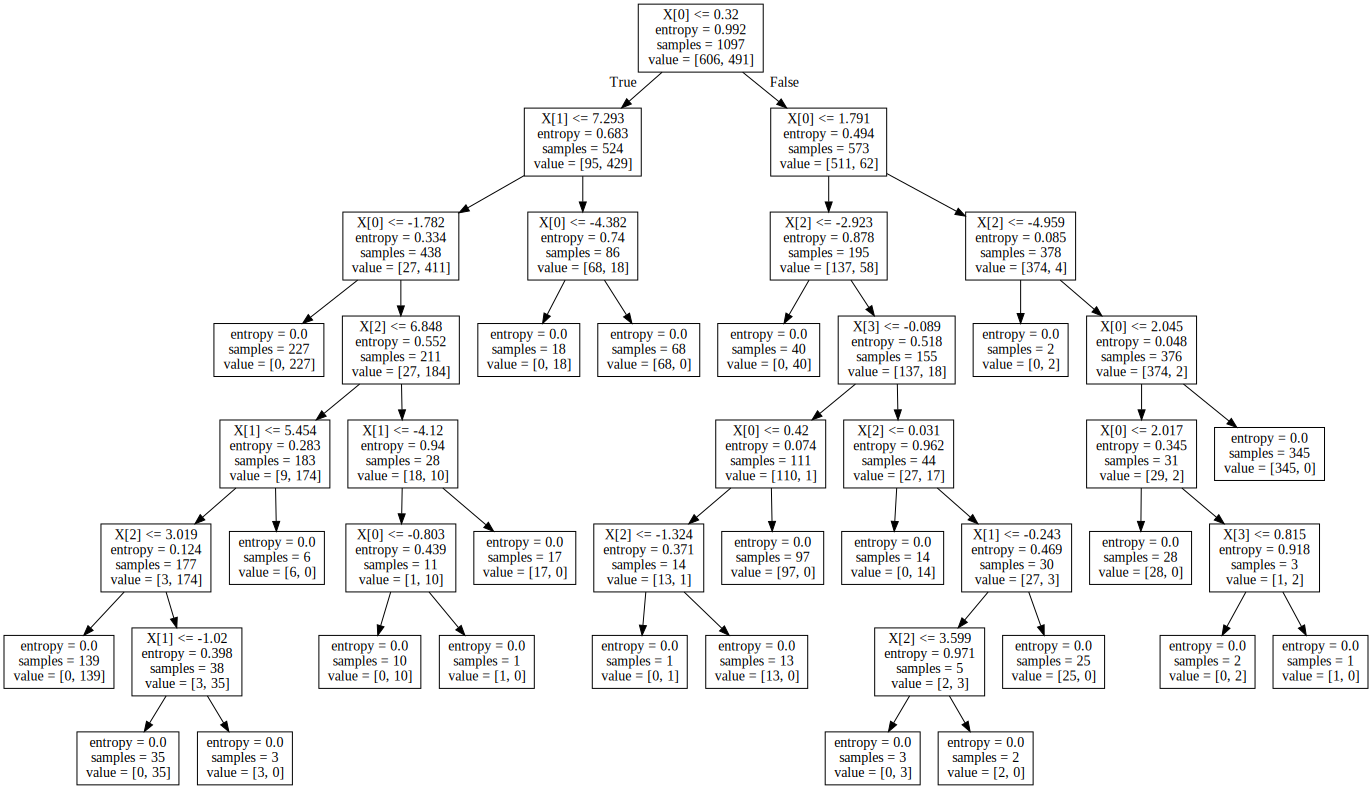

In [ ]:
dot_data = tree.export_graphviz(ID3, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("bill_authentication")

graph

# C4.5

In [ ]:
C45 = sklearn.tree.DecisionTreeClassifier(criterion = "gini")
C45.fit(X_train, y_train)
yc45_pred = C45.predict(X_test)

accuracy_C45 = cross_val_score(ID3,X_train,y_train,cv=2,scoring="neg_mean_absolute_error")
print(accuracy_C45) 

[-0.01457195 -0.02007299]


In [ ]:
print(confusion_matrix(y_test, yc45_pred))
print(classification_report(y_test, yc45_pred))

[[154   2]
 [  0 119]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       156
           1       0.98      1.00      0.99       119

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



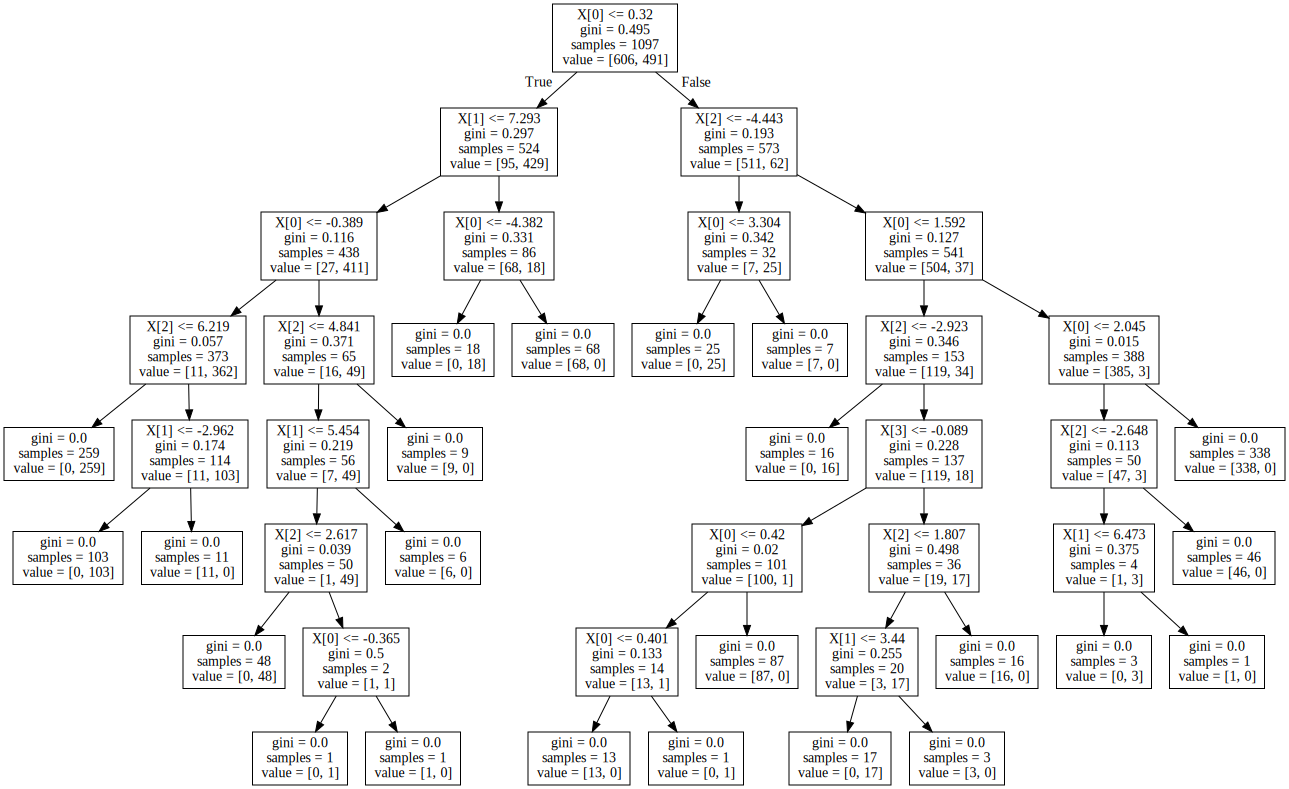

In [ ]:
dot_data = tree.export_graphviz(C45, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("bill_authencation")
graph